<a href="https://colab.research.google.com/github/codingpotato/pill-detection/blob/master/pill_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup Environment

## Clone Pill Detection

In [75]:
!git clone https://github.com/codingpotato/pill-detection.git

/content
Cloning into 'pill-detection'...
remote: Enumerating objects: 107, done.
remote: Counting objects: 100% (107/107), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 107 (delta 58), reused 28 (delta 10), pack-reused 0
Receiving objects: 100% (107/107), 463.46 KiB | 3.36 MiB/s, done.
Resolving deltas: 100% (58/58), done.


## Environment Variables

In [0]:
import os

os.environ['ROOT_DIR'] = os.getcwd()
os.environ['IMAGE_DIR'] = os.path.join(os.environ['ROOT_DIR'], 'images')
os.environ['TRAIN_DIR'] = os.path.join(os.environ['ROOT_DIR'], 'train')

os.environ['PILL_DETECTION_DIR'] = os.path.join(os.environ['ROOT_DIR'],
                                                'pill-detection')
os.environ['ORIGIN_IMAGE_DIR'] = os.path.join(os.environ['PILL_DETECTION_DIR'],
                                              'images')

In [0]:
!mkdir ${IMAGE_DIR}
!mkdir ${TRAIN_DIR}

## Download Pre-Trained Model

In [4]:
!wget http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet101_coco_2018_01_28.tar.gz

--2018-11-24 00:40:49--  http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet101_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.195.128, 2607:f8b0:400e:c03::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.195.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 593445323 (566M) [application/x-tar]
Saving to: ‘faster_rcnn_resnet101_coco_2018_01_28.tar.gz’

faster_rcnn_resnet1 100%[===================>] 565.95M   193MB/s    in 2.9s    

2018-11-24 00:40:52 (193 MB/s) - ‘faster_rcnn_resnet101_coco_2018_01_28.tar.gz’ saved [593445323/593445323]



In [5]:
!tar xfv faster_rcnn_resnet101_coco_2018_01_28.tar.gz
!cp faster_rcnn_resnet101_coco_2018_01_28/model.ckpt* ${TRAIN_DIR}

faster_rcnn_resnet101_coco_2018_01_28/
faster_rcnn_resnet101_coco_2018_01_28/model.ckpt.index
faster_rcnn_resnet101_coco_2018_01_28/checkpoint
faster_rcnn_resnet101_coco_2018_01_28/pipeline.config
faster_rcnn_resnet101_coco_2018_01_28/model.ckpt.data-00000-of-00001
faster_rcnn_resnet101_coco_2018_01_28/model.ckpt.meta
faster_rcnn_resnet101_coco_2018_01_28/saved_model/
faster_rcnn_resnet101_coco_2018_01_28/saved_model/saved_model.pb
faster_rcnn_resnet101_coco_2018_01_28/saved_model/variables/
faster_rcnn_resnet101_coco_2018_01_28/frozen_inference_graph.pb


## Install Tensorflow Object Detection API

In [6]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 22830 (delta 3), reused 5 (delta 3), pack-reused 22820
Receiving objects: 100% (22830/22830), 562.81 MiB | 28.50 MiB/s, done.
Resolving deltas: 100% (13289/13289), done.
Checking out files: 100% (2850/2850), done.


In [7]:
!pip install Cython
!apt-get install protobuf-compiler
!git clone https://github.com/cocodataset/cocoapi.git
!cd cocoapi/PythonAPI; make; cp -r pycocotools ${ROOT_DIR}/models/research/

    100% |████████████████████████████████| 2.0MB 8.2MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libprotobuf10 libprotoc10
The following NEW packages will be installed:
  libprotobuf10 libprotoc10 protobuf-compiler
0 upgraded, 3 newly installed, 0 to remove and 5 not upgraded.
Need to get 1,242 kB of archives.
After this operation, 4,942 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libprotobuf10 amd64 3.0.0-9.1ubuntu1 [651 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libprotoc10 amd64 3.0.0-9.1ubuntu1 [566 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 protobuf-compiler amd64 3.0.0-9.1ubuntu1 [24.5 kB]
Fetched 1,242 kB in 1s (953 kB/s)
Selecting previously unselected package libprotobuf10:amd64.
(Reading database ... 22298 files and directories currently installed.)
Preparing to unpack ..

In [76]:
%env PYTHONPATH=/content/models/research:/content/models/research/slim
%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.

env: PYTHONPATH=/content/models/research:/content/models/research/slim
/content/models/research


## Test Tensorflow Object Detection API

In [9]:
!python object_detection/builders/model_builder_test.py

......................
----------------------------------------------------------------------
Ran 22 tests in 0.129s

OK


# Prepare Images

In [0]:
%matplotlib inline

In [0]:
from PIL import Image
from random import randint

image_width = 1000
image_height = 1000

def generate_images(name):
  for index in xrange(1, 101):
    image = Image.new('RGB', (image_width, image_height), '#000')
    image_path = os.path.join(os.environ['ORIGIN_IMAGE_DIR'], name + '.png')
    pill_image = Image.open(image_path)
    rotated_image = pill_image.rotate(randint(0, 359), expand=True)
    x = randint(0, image_width - rotated_image.size[0])
    y = randint(0, image_height - rotated_image.size[1])
    image.paste(rotated_image, (x, y), rotated_image)
    save_path = os.path.join(os.environ['IMAGE_DIR'], 
                             name + '_' + str(index) + '.jpg')
    image.save(save_path)

In [0]:
files = os.listdir(os.environ['ORIGIN_IMAGE_DIR'])
labels = sorted([os.path.splitext(f)[0] for f in files])

In [0]:
for label in labels:
  generate_images(label)

In [0]:
import cv2

def boundingRect(image):
  image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  _, image_bw = cv2.threshold(image_bw, 1, 255, cv2.THRESH_BINARY)
  _, contours, _ = cv2.findContours(image_bw,
                                    cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  max_area = 0
  x, y, w, h = 0, 0, 0, 0
  for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > max_area:
      max_area = area
      x, y, w, h = cv2.boundingRect(cnt)
  return (x, y, w, h)

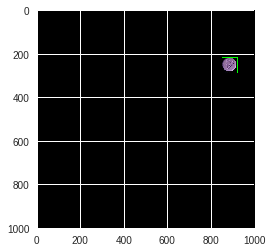

In [15]:
import matplotlib.pyplot as plt

image_path = os.path.join(os.environ['IMAGE_DIR'], labels[0] + '_1.jpg')
image = cv2.imread(image_path)
x, y, w, h = boundingRect(image)
cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.imshow(image)

# Prepare Data

## Create Label Map

In [0]:
file_path = os.path.join(os.environ['TRAIN_DIR'], 'label_map.pbtxt')
with open(file_path, 'w') as f:
  index = 1
  for label in labels:
    f.write("item {\n  id: " + str(index) + "\n  name: '" + label + "'\n}\n\n")
    index += 1

## Generate TF Record

In [0]:
import tensorflow as tf
from object_detection.utils import dataset_util


def generate_tf_record(record_path, start, size):
  writer = tf.python_io.TFRecordWriter(record_path)
  label_index = 1
  for label in labels:
    for index in xrange(start, start + size):
      filename = os.path.join(os.environ['IMAGE_DIR'],
                              label + '_' + str(index) + '.jpg')
      image = cv2.imread(filename)
      x, y, w, h = boundingRect(image)
    
      image_format = b'jpg'
      with tf.gfile.GFile(filename, 'rb') as fid:
        encoded_png = fid.read()
      
      xmin = float(x) / image_width
      ymin = float(y) / image_height
      xmax = float(x + w - 1) / image_width
      ymax = float(y + h - 1) / image_height
      
      tf_example = tf.train.Example(features=tf.train.Features(feature={
          'image/height': dataset_util.int64_feature(image_width),
          'image/width': dataset_util.int64_feature(image_height),
          'image/filename': dataset_util.bytes_feature(filename),
          'image/source_id': dataset_util.bytes_feature(filename),
          'image/encoded': dataset_util.bytes_feature(encoded_png),
          'image/format': dataset_util.bytes_feature(image_format),
          'image/object/bbox/xmin': dataset_util.float_list_feature([xmin]),
          'image/object/bbox/xmax': dataset_util.float_list_feature([xmax]),
          'image/object/bbox/ymin': dataset_util.float_list_feature([ymin]),
          'image/object/bbox/ymax': dataset_util.float_list_feature([ymax]),
          'image/object/class/text': dataset_util.bytes_list_feature(
              [label]),
          'image/object/class/label': dataset_util.int64_list_feature(
              [label_index]),
      }))
      writer.write(tf_example.SerializeToString())
    label_index += 1
  writer.close()

In [0]:
train_record = os.path.join(os.environ['TRAIN_DIR'], 'train.record')
generate_tf_record(train_record, 1, 80)
test_record = os.path.join(os.environ['TRAIN_DIR'], 'test.record')
generate_tf_record(test_record, 81, 20)

## Create Config file

In [0]:
!cp object_detection/samples/configs/faster_rcnn_resnet101_pets.config ${TRAIN_DIR}
!sed -i "s|num_classes: 37|num_classes: 10|g" ${TRAIN_DIR}/faster_rcnn_resnet101_pets.config
!sed -i "s|PATH_TO_BE_CONFIGURED|${TRAIN_DIR}|g" ${TRAIN_DIR}/faster_rcnn_resnet101_pets.config
!sed -i "s|pet_label_map.pbtxt|label_map.pbtxt|g" ${TRAIN_DIR}/faster_rcnn_resnet101_pets.config
!sed -i "s|pet_faces_train.record-?????-of-00010|train.record|g" ${TRAIN_DIR}/faster_rcnn_resnet101_pets.config
!sed -i "s|pet_faces_val.record-?????-of-00010|test.record|g" ${TRAIN_DIR}/faster_rcnn_resnet101_pets.config

# Train

In [0]:
get_ipython().system_raw('python object_detection/model_main.py \
    --pipeline_config_path=${TRAIN_DIR}/faster_rcnn_resnet101_pets.config \
    --model_dir=${TRAIN_DIR} \
    --num_train_steps=50000 \
    --sample_1_of_n_eval_examples=1 \
    --alsologtostderr 2> ${TRAIN_DIR}/train.log &')

# Download Model

In [0]:
!mkdir ${ROOT_DIR}/exported_graphs
!python object_detection/export_inference_graph.py \
  --input_type image_tensor \
  --pipeline_config_path ${TRAIN_DIR}/faster_rcnn_resnet101_pets.config \
  --trained_checkpoint_prefix ${TRAIN_DIR}/model.ckpt-18808 \
  --output_directory ${ROOT_DIR}/exported_graphs

rm: cannot remove '/content/exported_graphs': No such file or directory
Instructions for updating:
Please switch to tf.train.get_or_create_global_step
W1118 14:06:17.966794 139890043742080 tf_logging.py:125] From /content/models/research/object_detection/exporter.py:328: get_or_create_global_step (from tensorflow.contrib.framework.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Please switch to tf.train.get_or_create_global_step
Instructions for updating:
Use `tf.profiler.profile(graph, run_meta, op_log, cmd, options)`. Build `options` with `tf.profiler.ProfileOptionBuilder`. See README.md for details
W1118 14:06:17.973248 139890043742080 tf_logging.py:125] From /content/models/research/object_detection/exporter.py:482: print_model_analysis (from tensorflow.contrib.tfprof.model_analyzer) is deprecated and will be removed after 2018-01-01.
Instructions for updating:
Use `tf.profiler.profile(graph, run_meta, op_log, cmd, options)`. 

In [0]:
!zip -r exp_g.zip ${ROOT_DIR}/exported_graphs

  adding: content/exported_graphs/ (stored 0%)
  adding: content/exported_graphs/checkpoint (deflated 42%)
  adding: content/exported_graphs/saved_model/ (stored 0%)
  adding: content/exported_graphs/saved_model/saved_model.pb (deflated 16%)
  adding: content/exported_graphs/saved_model/variables/ (stored 0%)
  adding: content/exported_graphs/model.ckpt.data-00000-of-00001 (deflated 8%)
  adding: content/exported_graphs/model.ckpt.meta (deflated 95%)
  adding: content/exported_graphs/model.ckpt.index (deflated 69%)
  adding: content/exported_graphs/frozen_inference_graph.pb (deflated 15%)
  adding: content/exported_graphs/pipeline.config (deflated 69%)


In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
uploaded = drive.CreateFile({'title': 'exp_g.zip'})
uploaded.SetContentFile('exp_g.zip')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1UyhAr_WPwJdhWB8TzeULJCY36TVwOmmi


# TensorBoard

In [25]:
! wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
! unzip ngrok-stable-linux-amd64.zip

--2018-11-24 00:58:50--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.174.228.92, 54.173.32.212, 54.164.206.44, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.174.228.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5363700 (5.1M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]   5.11M  9.59MB/s    in 0.5s    

2018-11-24 00:58:51 (9.59 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [5363700/5363700]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
get_ipython().system_raw('tensorboard --logdir ${ROOT_DIR} --host 0.0.0.0 --port 6006 &')

In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

In [29]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
 "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://6a14fa63.ngrok.io


# Status

In [53]:
!uptime

 02:19:00 up  1:43,  0 users,  load average: 0.91, 0.83, 0.81


In [54]:
!ps -ef

UID          PID    PPID  C STIME TTY          TIME CMD
root           1       0  0 00:35 ?        00:00:00 /bin/bash -e /datalab/run.sh
root           9       1  0 00:35 ?        00:00:01 node /tools/node/bin/forever
root          30       9  0 00:35 ?        00:00:03 /tools/node/bin/node /datala
root          56      30  0 00:36 ?        00:00:05 /usr/bin/python2 /usr/local/
root          63      56  0 00:36 ?        00:00:59 /usr/bin/python -m ipykernel
root         317       1 66 00:58 ?        00:53:31 python2 object_detection/mod
root        5017       1  4 00:58 ?        00:03:24 /usr/bin/python2 /usr/local/
root        5047       1  0 00:59 ?        00:00:22 ./ngrok http 6006
root        6643      63 99 02:19 ?        00:00:01 ps -ef


In [0]:
!pwd

/content/models/research


In [73]:
!ls /content/pill_detection

ls: cannot access '/content/pill_detection': No such file or directory


In [57]:
!ls /content/train

checkpoint
eval_0
events.out.tfevents.1543021108.4199a57d17f2
faster_rcnn_resnet101_pets.config
graph.pbtxt
label_map.pbtxt
model.ckpt-3808.data-00000-of-00001
model.ckpt-3808.index
model.ckpt-3808.meta
model.ckpt-4684.data-00000-of-00001
model.ckpt-4684.index
model.ckpt-4684.meta
model.ckpt-5559.data-00000-of-00001
model.ckpt-5559.index
model.ckpt-5559.meta
model.ckpt-6434.data-00000-of-00001
model.ckpt-6434.index
model.ckpt-6434.meta
model.ckpt-7310.data-00000-of-00001
model.ckpt-7310.index
model.ckpt-7310.meta
model.ckpt.data-00000-of-00001
model.ckpt.index
model.ckpt.meta
test.record
train.log
train.record


In [27]:
%cat /content/train/train.log

/content/models/research/object_detection/utils/visualization_utils.py:27: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "object_detection/model_main.py", line 26, in <module>
    from object_detection import model_lib
  File "/content/models/research/object_detection/model_lib.py", line 27, in <module>
    from object_detection import eval_util
  File "/content/models/research/object_detection/eval_util.py", line 27, in <module>
    from object_detection.metrics import coco_evaluation
  File "/content/models/research/object_detection/metrics/coco_evaluation.py", line 20, in <module>
    from object_detection.metrics import coco_tools
  File "/content/models/research/object_detection/metrics/coco_tools.

# Test Model

## Export Graphs

In [58]:
!mkdir ${ROOT_DIR}/exported_graphs
!python object_detection/export_inference_graph.py \
  --input_type image_tensor \
  --pipeline_config_path ${TRAIN_DIR}/faster_rcnn_resnet101_pets.config \
  --trained_checkpoint_prefix ${TRAIN_DIR}/model.ckpt-6434 \
  --output_directory ${ROOT_DIR}/exported_graphs

Instructions for updating:
keep_dims is deprecated, use keepdims instead
W1124 02:22:36.742897 139884854400896 tf_logging.py:125] From /content/models/research/object_detection/predictors/heads/box_head.py:93: calling reduce_mean (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Please switch to tf.train.get_or_create_global_step
W1124 02:22:38.809473 139884854400896 tf_logging.py:125] From /content/models/research/object_detection/exporter.py:328: get_or_create_global_step (from tensorflow.contrib.framework.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Please switch to tf.train.get_or_create_global_step
Instructions for updating:
Use `tf.profiler.profile(graph, run_meta, op_log, cmd, options)`. Build `options` with `tf.profiler.ProfileOptionBuilder`. See README.md for deta

## Load Model into Memory

In [81]:
import numpy as np
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

object_detection/utils/visualization_utils.py:27: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python2.7/dist-packages

In [64]:
PATH_TO_FROZEN_GRAPH = os.path.join('/content/exported_graphs',
                                    'frozen_inference_graph.pb')
PATH_TO_LABELS = os.path.join(os.environ['TRAIN_DIR'], 'label_map.pbtxt')

/content/exported_graphs/frozen_inference_graph.pb


In [0]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

## Load Label Map

In [0]:
category_index = label_map_util.create_category_index_from_labelmap(
    PATH_TO_LABELS, use_display_name=True)

## Detection

In [0]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [0]:
PATH_TO_TEST_IMAGES_DIR = os.path.join(os.environ['PILL_DETECTION_DIR'],
                                                  'test_images')
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR,
                                  'image{}.jpg'.format(i)) for i in range(1, 2)]

In [0]:
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: np.expand_dims(image, 0)})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict

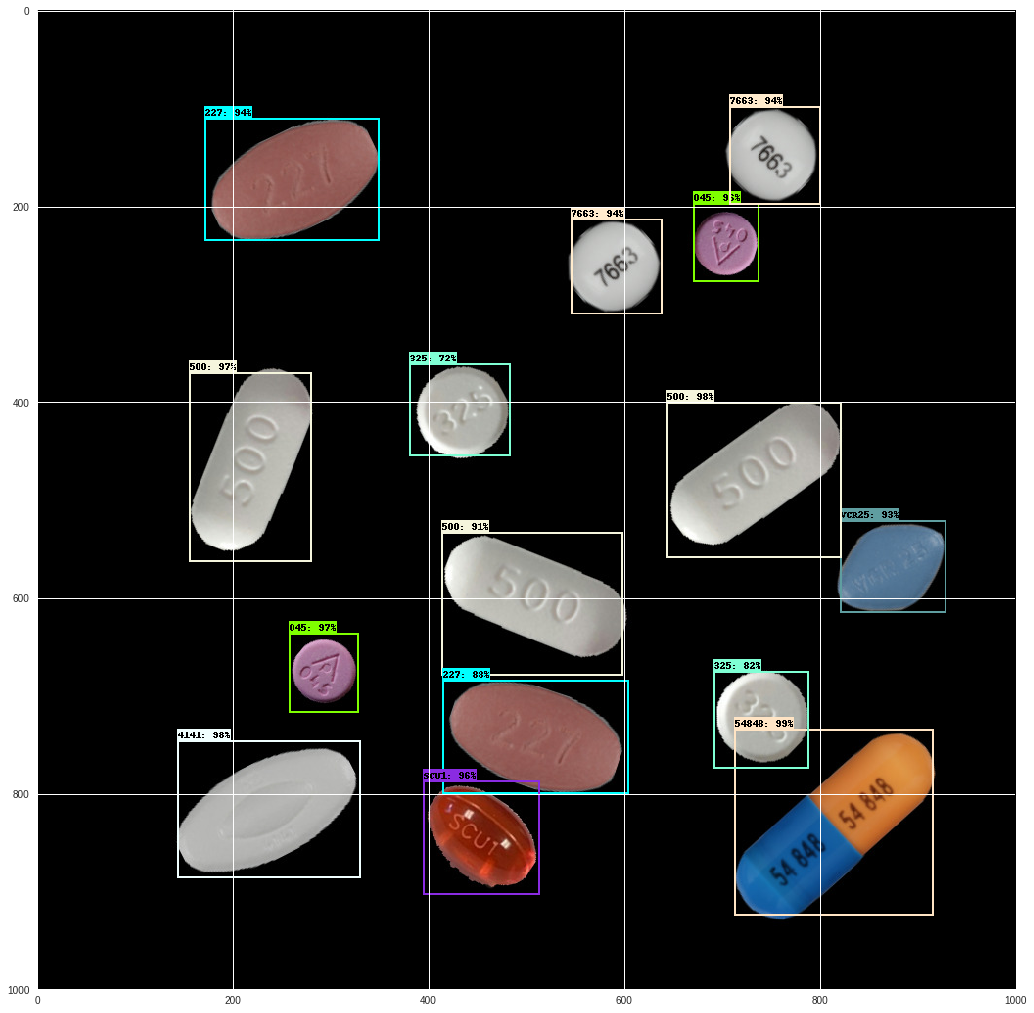

In [89]:
for image_path in TEST_IMAGE_PATHS:
  image = Image.open(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np, detection_graph)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=2)
  plt.figure(figsize=(18, 18))
  plt.imshow(image_np)